In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np

In [3]:
columns=['Seed', 
         'Binary', 
         'OnesInBinary', 
         'ConsOnesInBinary', 
         'BinaryChanges', 
         'PathLength', 
         'ParitySequence', 
         'ParityNumber',
         'BackwardsParityNumber',
         'StdHeuristics', 
         'LogN', 
         'LogPerLogLog', 
         'Consecutive']

In [4]:
df=pd.read_csv('number_dump.csv', dtype=object, engine='python', error_bad_lines=False, nrows=2000000, usecols=columns)

In [5]:
df.head(100)

,Seed,Binary,OnesInBinary,ConsOnesInBinary,BinaryChanges,PathLength,ParitySequence,ParityNumber,BackwardsParityNumber,StdHeuristics,LogN,LogPerLogLog,Consecutive
0,1,1,1,0,0,1,1,1,1,0.0,0.0,inf,2
1,2,10,1,0,1,2,01,1,2,7.228262518959628,0.6931471805599453,-1.8911943935288964,1
2,3,11,2,2,0,8,10100001,161,133,11.456525037919258,1.0986122886681098,11.68142121416785,1
3,4,100,1,0,1,3,001,1,4,14.456525037919256,1.3862943611198906,4.24417928851698,1
4,5,101,2,0,2,6,100001,33,33,16.783505819993657,1.6094379124341003,3.3819891953681287,1
5,6,110,2,2,1,9,010100001,161,266,18.684787556878884,1.791759469228055,3.072300009669941,1
6,7,111,3,3,0,17,10101001000100001,86561,67733,20.29229836052581,1.9459101490553132,2.922972830922243,1
7,8,1000,1,0,1,4,0001,1,8,21.684787556878884,2.0794415416798357,2.84038155519115,1
8,9,1001,2,0,2,20,10010101001000100001,610849,541865,22.913050075838516,2.1972245773362196,2.791207457508633,1
9,10,1010,2,0,3,7,0100001,33,66,24.01176833895329,2.302585092994046,2.7607859935346912,1


In [6]:
numcols = ['Seed',  
         'OnesInBinary', 
         'ConsOnesInBinary', 
         'BinaryChanges', 
         'StdHeuristics', 
         'LogN', 
         'LogPerLogLog']

In [7]:
X = df[numcols+['PathLength']][df.Seed!='Seed'].astype('float')

In [8]:
del df

In [27]:
from seaborn import pairplot

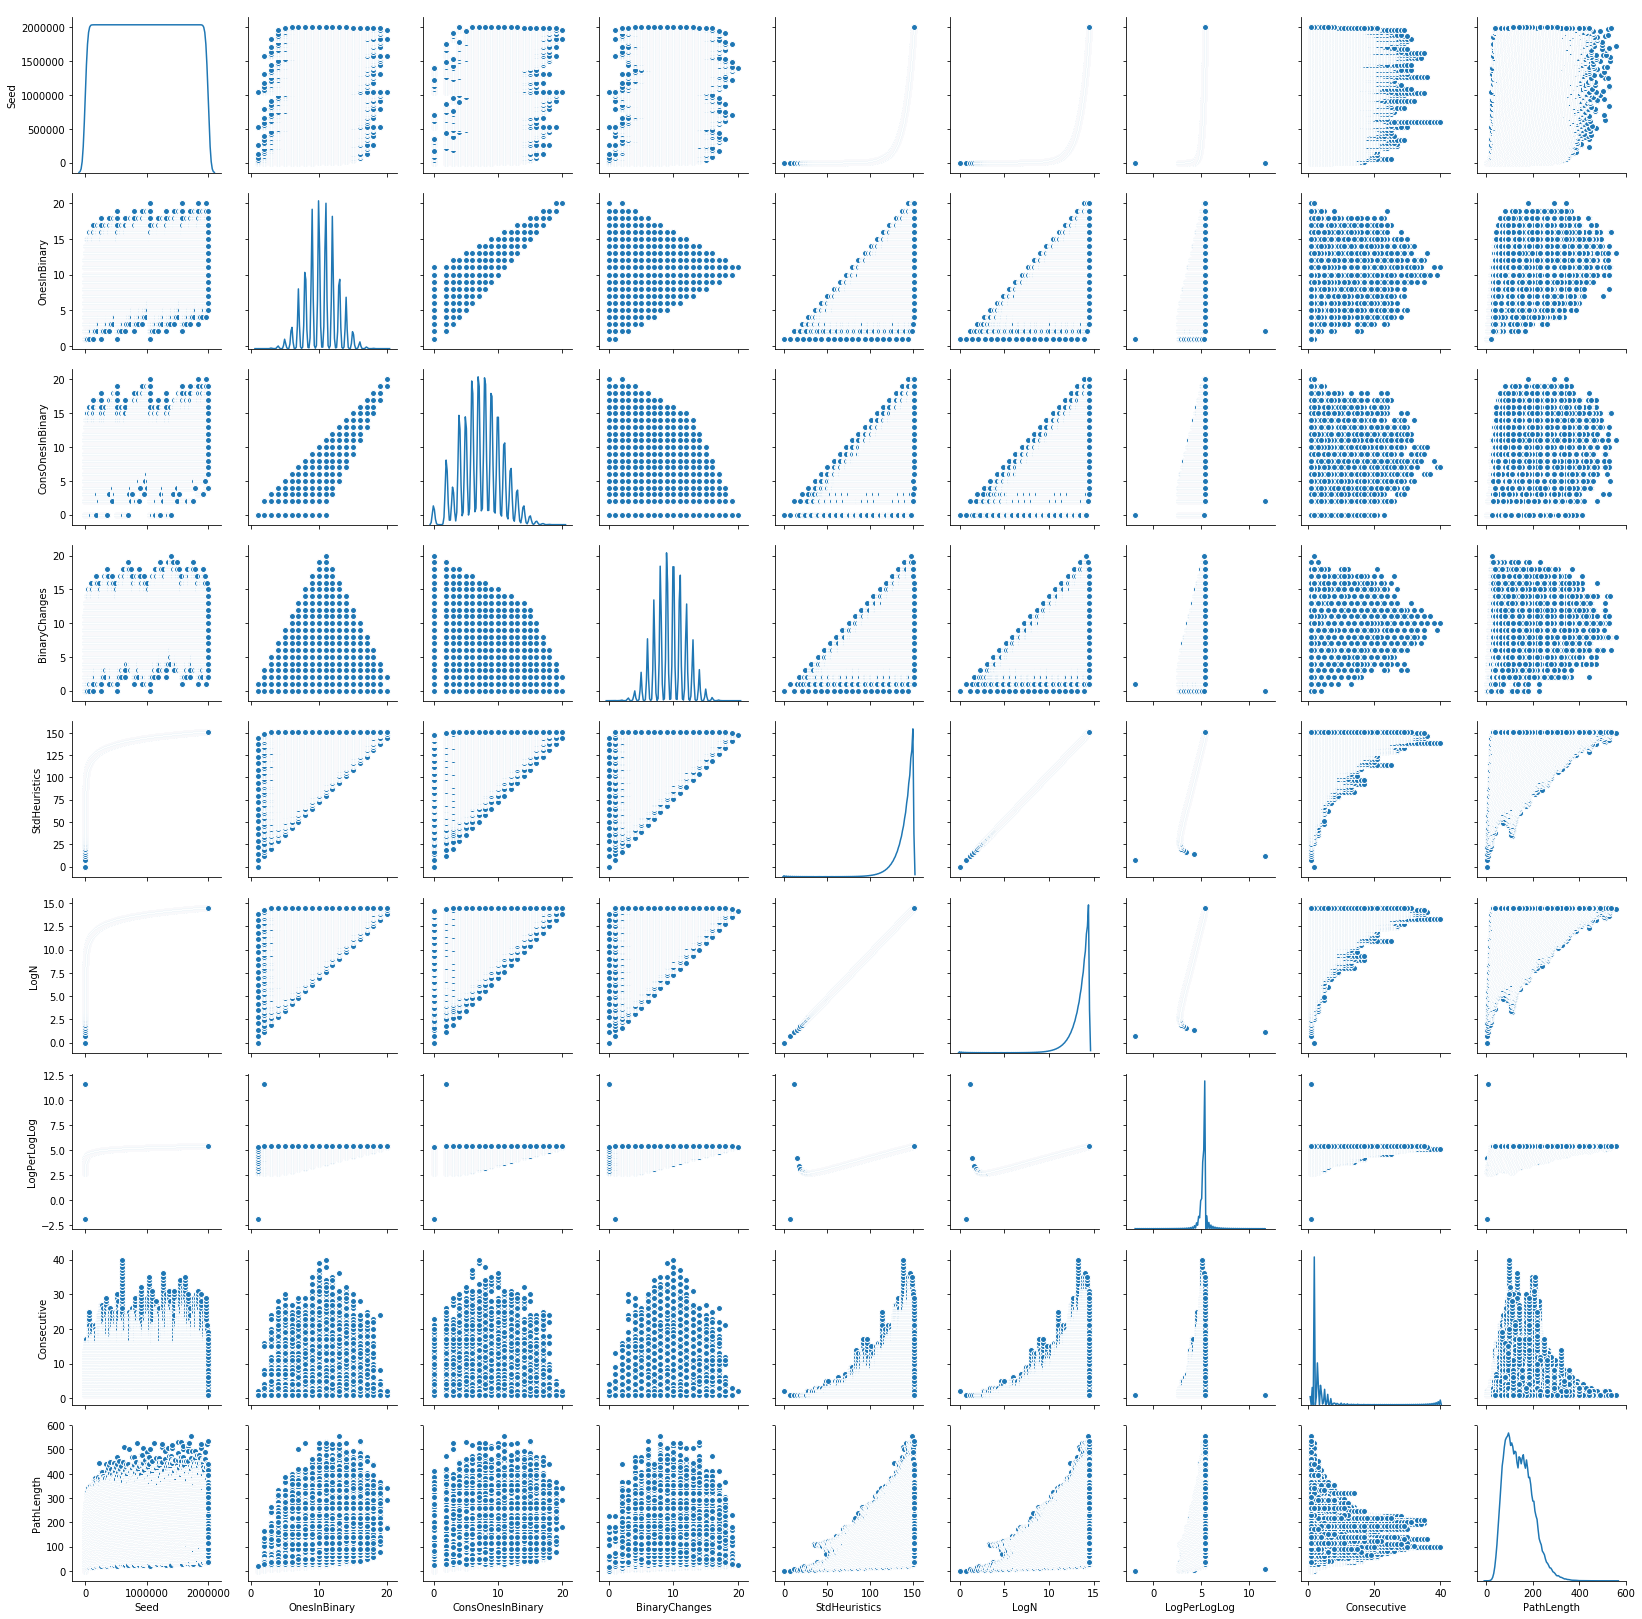

In [29]:
pairplot(X, diag_kind='kde')

In [9]:
X=X[X['LogPerLogLog']!=np.inf]

In [10]:
from sklearn.decomposition import PCA

In [11]:
Y=X['PathLength']
X=X.drop(columns=['PathLength'])

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:

pca = PCA(4)
new_X = pca.fit_transform(StandardScaler().fit_transform(X.values))

In [72]:
new_X.shape

(1999800, 4)

In [73]:
pca.explained_variance_ratio_

array([ 0.5973625 ,  0.25061595,  0.11851673,  0.02829029])

In [74]:
pca.singular_values_

array([ 2891.75355513,  1873.03829843,  1288.04825944,   629.30468767])

In [75]:
pca.components_

array([[-0.44078361, -0.25919006, -0.18779822, -0.15857043, -0.47564058,
        -0.47564058, -0.47502594],
       [-0.08612906,  0.55601288,  0.68876499, -0.4073878 , -0.11977579,
        -0.11977579, -0.11990391],
       [ 0.16302128, -0.44088154, -0.05794859, -0.85057186,  0.13215888,
         0.13215888,  0.1314727 ],
       [ 0.87738448, -0.02443709,  0.01677019,  0.0518774 , -0.26798475,
        -0.26798475, -0.28808877]])

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3)

In [20]:
mut_info = mutual_info_classif(X_test, Y_test, discrete_features=[0, 1, 2, 3], n_neighbors=3)
mut_info

array([ 5.31300434,  0.0594042 ,  0.06513985,  0.06107164,  3.66136696,
        3.66131082,  3.66138806])

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.linear_model import SGDRegressor

In [16]:
small_X=X.drop(columns=['OnesInBinary', 
                        'ConsOnesInBinary', 
                        'BinaryChanges' ])

In [46]:
param = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['elasticnet'],
    'alpha': 10**linspace(-5, 5, 11),
    'l1_ratio': [0.05*i for i in range(21)],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'epsilon': 10**linspace(-8, -2, 7),
    'verbose': [1],
}

cv = RandomizedSearchCV(SGDRegressor(), param, scoring='explained_variance', n_jobs=2, verbose=1, n_iter=15000)


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(small_X.values, Y.values, test_size=0.5)

In [48]:
%time

cv.fit(X_test, Y_test)

Wall time: 0 ns
Fitting 3 folds for each of 15000 candidates, totalling 45000 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  8.6min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 11.9min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 15.9min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 20.5min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 25.9min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed: 31.8min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed: 38.3min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 45.3min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 53.1min
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed: 61.4min
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed: 70.4min
[Parallel(n_jobs=2)]: Done 12796 tasks      | elapsed: 80.0min
[Parallel(

-- Epoch 1
Norm: 0.00, NNZs: 4, Bias: 0.000000, T: 999900, Avg. loss: 0.000001
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4, Bias: 0.000000, T: 1999800, Avg. loss: 0.000001
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4, Bias: 0.000000, T: 2999700, Avg. loss: 0.000001
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4, Bias: 0.000000, T: 3999600, Avg. loss: 0.000001
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4, Bias: 0.000000, T: 4999500, Avg. loss: 0.000001
Total training time: 0.95 seconds.


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
          fit_params=None, iid=True, n_iter=15000, n_jobs=2,
          param_distributions={'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'penalty': ['elasticnet'], 'alpha': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03...   1.00000e-06,   1.00000e-05,
         1.00000e-04,   1.00000e-03,   1.00000e-02]), 'verbose': [1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='explained_variance',
          verbo

In [49]:
cv.best_score_, cv.best_params_

(0.021538177239372899,
 {'alpha': 1000.0,
  'epsilon': 1e-08,
  'fit_intercept': False,
  'l1_ratio': 0.0,
  'loss': 'huber',
  'penalty': 'elasticnet',
  'shuffle': True,
  'verbose': 1})

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y.values, test_size=0.5)

In [51]:
%time

cv.fit(X_test, Y_test)

Wall time: 0 ns
Fitting 3 folds for each of 15000 candidates, totalling 45000 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   19.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 11.1min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 15.1min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 19.6min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 24.8min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed: 30.6min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed: 37.0min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 44.1min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 51.8min
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed: 60.2min
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed: 69.1min
[Parallel(n_jobs=2)]: Done 12796 tasks      | elapsed: 78.7min
[Parallel(

-- Epoch 1
Norm: 9.49, NNZs: 3, Bias: 139.800866, T: 999900, Avg. loss: 1627.187364
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 10.00, NNZs: 3, Bias: 140.574465, T: 1999800, Avg. loss: 1624.906514
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 8.60, NNZs: 3, Bias: 139.020288, T: 2999700, Avg. loss: 1624.761904
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 9.57, NNZs: 3, Bias: 139.306707, T: 3999600, Avg. loss: 1624.711438
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 8.42, NNZs: 3, Bias: 139.904639, T: 4999500, Avg. loss: 1624.584558
Total training time: 0.94 seconds.


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
          fit_params=None, iid=True, n_iter=15000, n_jobs=2,
          param_distributions={'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'penalty': ['elasticnet'], 'alpha': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03...   1.00000e-06,   1.00000e-05,
         1.00000e-04,   1.00000e-03,   1.00000e-02]), 'verbose': [1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='explained_variance',
          verbo

In [52]:
cv.best_score_, cv.best_params_

(0.043549013637339463,
 {'alpha': 0.10000000000000001,
  'epsilon': 0.01,
  'fit_intercept': True,
  'l1_ratio': 0.7000000000000001,
  'loss': 'squared_loss',
  'penalty': 'elasticnet',
  'shuffle': True,
  'verbose': 1})

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
param = {
    'n_estimators': [i+5 for i in range(10)],
    'criterion': ['mse', 'mae'],
    'min_weight_fraction_leaf': [0.005*(i+1) for i in range(21)],
}

cv = RandomizedSearchCV(RandomForestRegressor(verbose=10), param, scoring='explained_variance', n_jobs=2, verbose=10, n_iter=10)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y.values, test_size=0.1)

In [21]:
%time

cv.fit(X_test, Y_test)

Wall time: 0 ns
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed: 20.0min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed: 21.0min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 21.3min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 59.6min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 107.1min
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 213.6min finished


building tree 1 of 12


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 12


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 12


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


building tree 4 of 12


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


building tree 5 of 12


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s


building tree 6 of 12


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s


building tree 7 of 12


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.0s remaining:    0.0s


building tree 8 of 12


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s remaining:    0.0s


building tree 9 of 12


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.9s remaining:    0.0s


building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.2s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=10,
           warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'criterion': ['mse', 'mae'], 'min_weight_fraction_leaf': [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='explained_variance',
          verbose=10)

In [22]:
cv.best_score_, cv.best_params_

(0.042610033515732081,
 {'criterion': 'mse', 'min_weight_fraction_leaf': 0.015, 'n_estimators': 12})

In [17]:
from sklearn.ensemble import AdaBoostRegressor

In [18]:
param = {
    'n_estimators': [10*(i+1) for i in range(10)],
    'loss': ['linear', 'square', 'exponential']
}

cv = GridSearchCV(AdaBoostRegressor(), param, scoring='explained_variance', n_jobs=2, verbose=10)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y.values, test_size=0.5)

In [20]:
%time

cv.fit(X_test, Y_test)

Wall time: 0 ns
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   16.8s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   39.1s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  4.8min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  8.2min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 11.7min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 18.7min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 22.6min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 29.9min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 37.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=10)

In [21]:
cv.best_score_, cv.best_params_

(0.040773983675200395, {'loss': 'exponential', 'n_estimators': 10})